In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
with open( 'features_wikihow_gusum.pkl' , 'rb' ) as file:
    features = pickle.load( file )
    features = np.array( features )

sentence_lengths = [ len( feature ) for feature in features[ : , 1 ] ]
max_length = max( sentence_lengths )
median_length = np.median( sentence_lengths )
mean_length = np.mean( sentence_lengths )

/tmp/ipykernel_8953/2220197261.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array( features )


In [5]:
def pad_feature( features , pad_length=166 ):
    padded_features = []
    pad_length = int( pad_length )
    for feature in features:
        if len( feature ) >= pad_length:
            feature = feature[ 0 : pad_length ]
        elif len( feature ) < pad_length:
            for _ in range( len(feature) , pad_length ):
                feature.append( 0.0 )
        padded_features.append( feature )
    return np.array( padded_features )

f1 = pad_feature( features[ : , 0 ] , pad_length=median_length )
f2 = pad_feature( features[ : , 1 ] , pad_length=median_length )
f3 = pad_feature( features[ : , 2 ] , pad_length=median_length )
f4 = pad_feature( features[ : , 3 ] , pad_length=median_length )

# Feature Value vs. Sentence Position

In [7]:
agg_f1 = np.mean( f1 , axis=0 )
agg_f2 = np.mean( f2 , axis=0 )
agg_f3 = np.mean( f3 , axis=0 )
agg_f4 = np.mean( f4 , axis=0 )

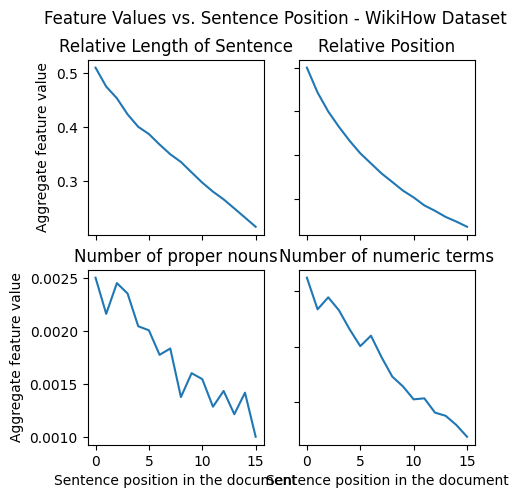

In [11]:
plot_features = [ agg_f1 , agg_f2 , agg_f3 , agg_f4 ]
plot_titles = [ 'Relative Length of Sentence' , 'Relative Position' , 'Number of proper nouns' , 'Number of numeric terms' ]
fig, axs = plt.subplots( 2 , 2 , figsize=( 7 , 7 ) )
fig.suptitle( 'Feature Values vs. Sentence Position - WikiHow Dataset')
for i in range( 2 ):
    for j in range( 2 ):
        axs[ i , j ].plot( plot_features[ i * 2 + j ] )
        axs[ i , j ].set_title( plot_titles[ i * 2 + j ] )

for ax in axs.flat:
    ax.set( xlabel='Sentence position in the document', ylabel='Aggregate feature value' )

for ax in axs.flat:
    ax.label_outer()

# Sentence Importance vs Sentence Position

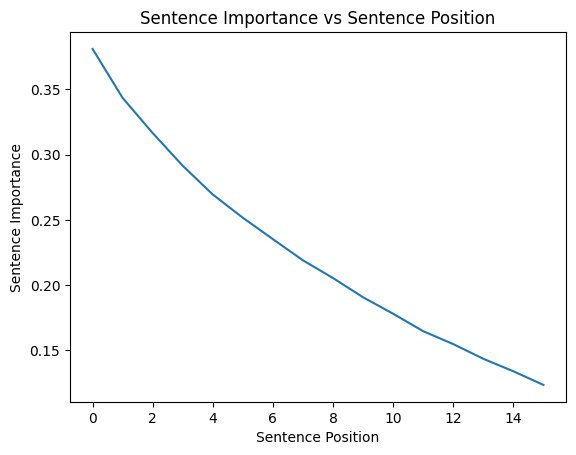

In [9]:
values = np.mean( ( f1 + f2 + f3 + f4 ) / 4 , axis=0 )
plt.plot( values )
plt.title( "Sentence Importance vs Sentence Position" )
plt.xlabel( "Sentence Position" ) 
plt.ylabel( "Sentence Importance" )
plt.show()